# 443076_m1 heatmaps

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
import plotly.express as px
import os
import pickle
import seaborn as sns

In [2]:
number_of_days = 11 #change this values based on number of days

## load files from folder

In [3]:
def pickle_from_folder(folder_path, keyword="m1"):
    # Initialize an empty list to store loaded data
    loaded_data = []

    # Iterate over files in the folder
    for filename in os.listdir(folder_path):
        # Check if the file contains the keyword
        print(filename)
        if keyword in filename:
            # Check if the file is a pickle file
            if filename.endswith('.pickle'):
                file_path = os.path.join(folder_path, filename)
                try:
                    # Open the pickle file in read-binary mode
                    with open(file_path, 'rb') as file:
                        # Load the data from the pickle file
                        data = pickle.load(file)
                        loaded_data.append(data)
                except Exception as e:
                    print(f"Error loading {filename}: {e}")
    print(loaded_data)
    return loaded_data

In [13]:
shared_path = "X:/Raymond Lab/1_Kai/3_processed_data/2_pickle/stage3"
days = [f"day{i}" for i in range(1, number_of_days + 1)]
folder_path = os.path.join(shared_path, day)
s_v1_path = os.path.join(folder_path, "single", "v1")

In [14]:
pickle_from_folder(s_v1_path, keyword = "m1")

443076_m3_stage3_day5_single_v1.pickle
443996_m5_stage3_day5_single_v1.pickle
[]


[]

In [5]:
shared_path = "X:/Raymond Lab/1_Kai/3_processed_data/2_pickle/stage3"
days = [f"day{i}" for i in range(1, number_of_days + 1)]
folder_path = os.path.join(shared_path, day)
s_v1_path = os.path.join(folder_path, "single", "v1")
keyword = "m1"
loaded_data = []
for filename in os.listdir(s_v1_path):
        # Check if the file contains the keyword
    print(filename)
    if keyword in filename:
            # Check if the file is a pickle file
        if filename.endswith('.pickle'):
            file_path = os.path.join(folder_path, filename)
            try:
                # Open the pickle file in read-binary mode
                with open(file_path, 'rb') as file:
                        # Load the data from the pickle file
                    data = pickle.load(file)
                    loaded_data.append(data)
            except Exception as e:
                print(f"Error loading {filename}: {e}")
print(loaded_data)

NameError: name 'day' is not defined

In [8]:
# Define the shared folder path
shared_path = "X:/Raymond Lab/1_Kai/3_processed_data/2_pickle/stage3"
days = [f"day{i}" for i in range(1, number_of_days + 1)]

# single flash heatmaps

In [15]:
def load_day_s(folder_path, day_name):
    # Load data for single and double trials
    s_v1_path = os.path.join(folder_path, "single", "v1")
    s_v1_data = pickle_from_folder(s_v1_path)

    # Calculate mean for single trials
    #s_v1_means = [np.mean(data, axis=(1, 2)) for data in s_v1_data]
    avg_s_v1 = np.stack(s_v1_data, axis=0)
    
    return avg_s_v1

In [16]:
all_averages_s = []
for day in days:
    folder_path = os.path.join(shared_path, day)
    all_averages_s.append(load_day_s(folder_path, day))


443076_m1_stage3_day1_single_v1.pickle
443076_m3_stage3_day1_single_v1.pickle
443996_m5_stage3_day1_single_v1.pickle
[array([[[-0.00155359, -0.00141266, -0.00135689, ..., -0.00096406,
         -0.00099333, -0.00108242],
        [-0.00157245, -0.00145409, -0.00138336, ..., -0.0009954 ,
         -0.00102872, -0.00110704],
        [-0.0014807 , -0.00136053, -0.00127254, ..., -0.00089605,
         -0.00095392, -0.00106565],
        [-0.00133787, -0.00122456, -0.00111375, ..., -0.00077711,
         -0.00088786, -0.00106052],
        [-0.00121649, -0.00112214, -0.00100547, ..., -0.00072059,
         -0.00088491, -0.00109944],
        [-0.00113441, -0.00105766, -0.0009414 , ..., -0.00065257,
         -0.00085507, -0.00111691]],

       [[-0.00148357, -0.00136147, -0.00133338, ..., -0.0009295 ,
         -0.00096086, -0.00106876],
        [-0.00148015, -0.00138287, -0.00134454, ..., -0.00095889,
         -0.00099984, -0.00109752],
        [-0.00138948, -0.00129375, -0.00123659, ..., -0.00086511

ValueError: need at least one array to stack

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 3 dimensions. The detected shape was (4, 1, 330) + inhomogeneous part.

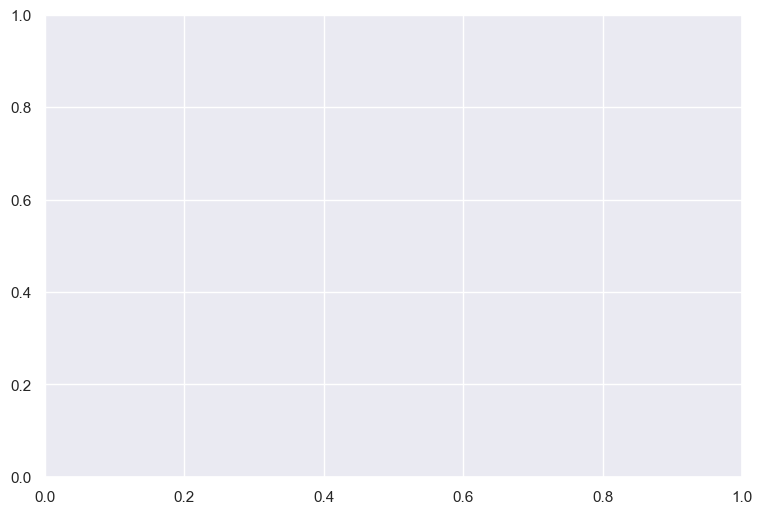

In [17]:
sns.set_theme()

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(all_averages_s, cmap = "jet")
ax.set_yticklabels([str(i) for i in range(1, len(all_averages_s) + 1)])
ax.set(xlabel="frames (30fps)", ylabel="day")

# double flash heatmaps

In [ ]:
def load_day_d(folder_path, day_name):
    d_v1_path = os.path.join(folder_path, "double", "v1")
    d_v1_data = pickle_from_folder(d_v1_path)

    # Calculate mean for single trials
    d_v1_means = [np.mean(data, axis=(1, 2)) for data in d_v1_data]
    avg_d_v1 = np.mean(np.stack(d_v1_means), axis=0)
    
    return avg_d_v1

In [ ]:
all_averages_d = []
for day in days:
    folder_path = os.path.join(shared_path, day)
    all_averages_d.append(load_day_d(folder_path, day))


In [ ]:
sns.set_theme()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(all_averages_d, cmap = "jet")
ax.set_yticklabels([str(i) for i in range(1, len(all_averages_d) + 1)])
ax.set(xlabel="frames (30fps)", ylabel="day")